In [17]:
import numpy as np
import pandas
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, SimpleRNN, LSTM, Flatten
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [31]:
from random import randint as randint
def randcolor(n):
    buf = [str('#' + str(randint(10,99)) + '' + str(randint(10,99)) + ''+ str(randint(10,99))) for i in range(n)]
    return buf

Создание выборки по углам

In [ ]:
def create_tg_viborka(arr):
    tg_a_p = []
    for i in arr:
        buf = []
        for c in range(1,len(i)):
            buf.append(np.arctan((i[c] - i[0])/c))
        tg_a_p.append(buf)
    return tg_a_p

Создание выборки для кластеризации

In [4]:
def create_viborka(start, arr):
    arr_sr_t = []
    for i in range(len(arr) - start):
        arr_sr_t.append(arr[i:i + start])
    return arr_sr_t

In [ ]:
Визуализация результатов класстеризации

In [34]:
def visualize(n_clust, predictions, arr, file_name = 'ind.png', sh = False):

    colors = randcolor(n_clust)

    for i in range(len(predictions)):
        val = arr[i]
        color = predictions[i]

        plt.scatter(i, val, c = colors[color])
        
    plt.plot(arr)
    if sh:
        plt.show()
    plt.savefig(file_name)

Чиатем файл 2018 года и составляем список температур

In [6]:
d = pandas.read_excel('2018.xlsx', engine='openpyxl')
temp = []
buf = []
c = 0
for i in d['T']:
  buf.append(i)
  c += 1
  if c == 8:
    temp.append(buf)
    buf = []
    c = 0

Список средних значений в пачке

In [8]:
def mean_arr(arr):
    sr_temp = []
    for i in arr:
        sr_temp.append(np.mean(i))
    return sr_temp

In [9]:
sr_temp = mean_arr(temp)

Выборка для класстеризации, количестов кластеров, сколько элементов в пачке для выборки

In [12]:
clusters__ = 8
in_vibor__ = 6

x_train = create_viborka(in_vibor__, sr_temp)
x_tg_train = create_tg_viborka(x_train)

Создание модели для класстеризации, ее обучение и прогнозировние

In [18]:
k_mean_model = KMeans(n_clusters = clusters__)
k_mean_model.fit(x_tg_train)
predictions = k_mean_model.predict(x_tg_train)

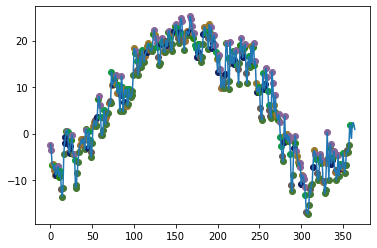

<Figure size 432x288 with 0 Axes>

In [36]:
visualize(clusters__,predictions,  sr_temp , sh = True)